In [3]:

# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

In [4]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

In [5]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 4

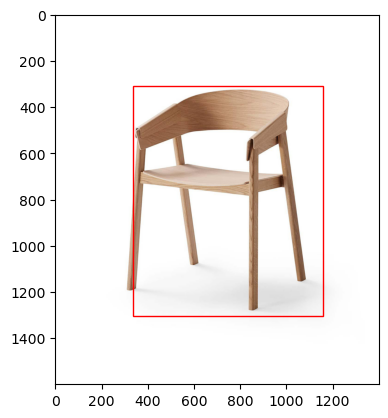

In [6]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_model_cfg_coco_4_0020.h5', by_name=True)
# load photograph
img = load_img('kursi.jpg')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# visualize the results
draw_image_with_boxes('kursi.jpg', results[0]['rois'])

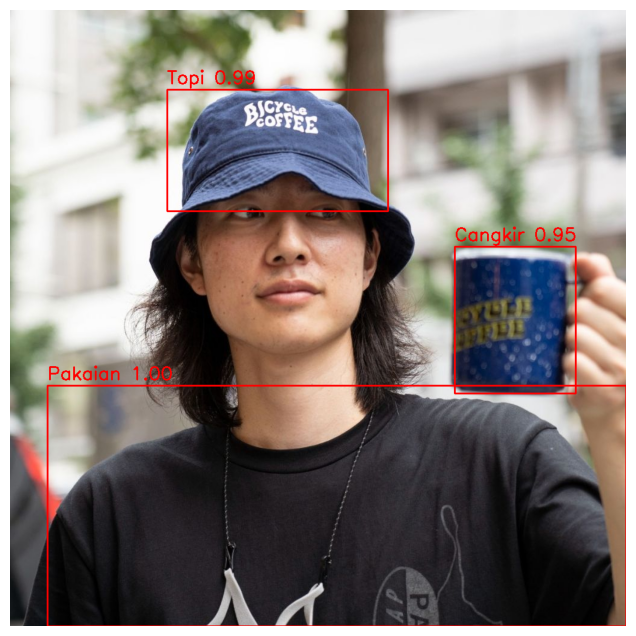

In [11]:
import mrcnn
import mrcnn.config
import mrcnn.model
import cv2
import os
import matplotlib.pyplot as plt

CLASS_NAMES = ['BG','Topi', 'Pakaian', 'Meja','Cangkir']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

model.load_weights(filepath="mask_rcnn_model_cfg_coco_4_0020.h5", 
                   by_name=True)

image = cv2.imread("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset/val/test14.jpg")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image_rgb])[0]

for i in range(len(r['rois'])):
    class_id = r['class_ids'][i]
    class_name = CLASS_NAMES[class_id]
    score = r['scores'][i]
    y1, x1, y2, x2 = r['rois'][i]
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image_rgb, f"{class_name} {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Display image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


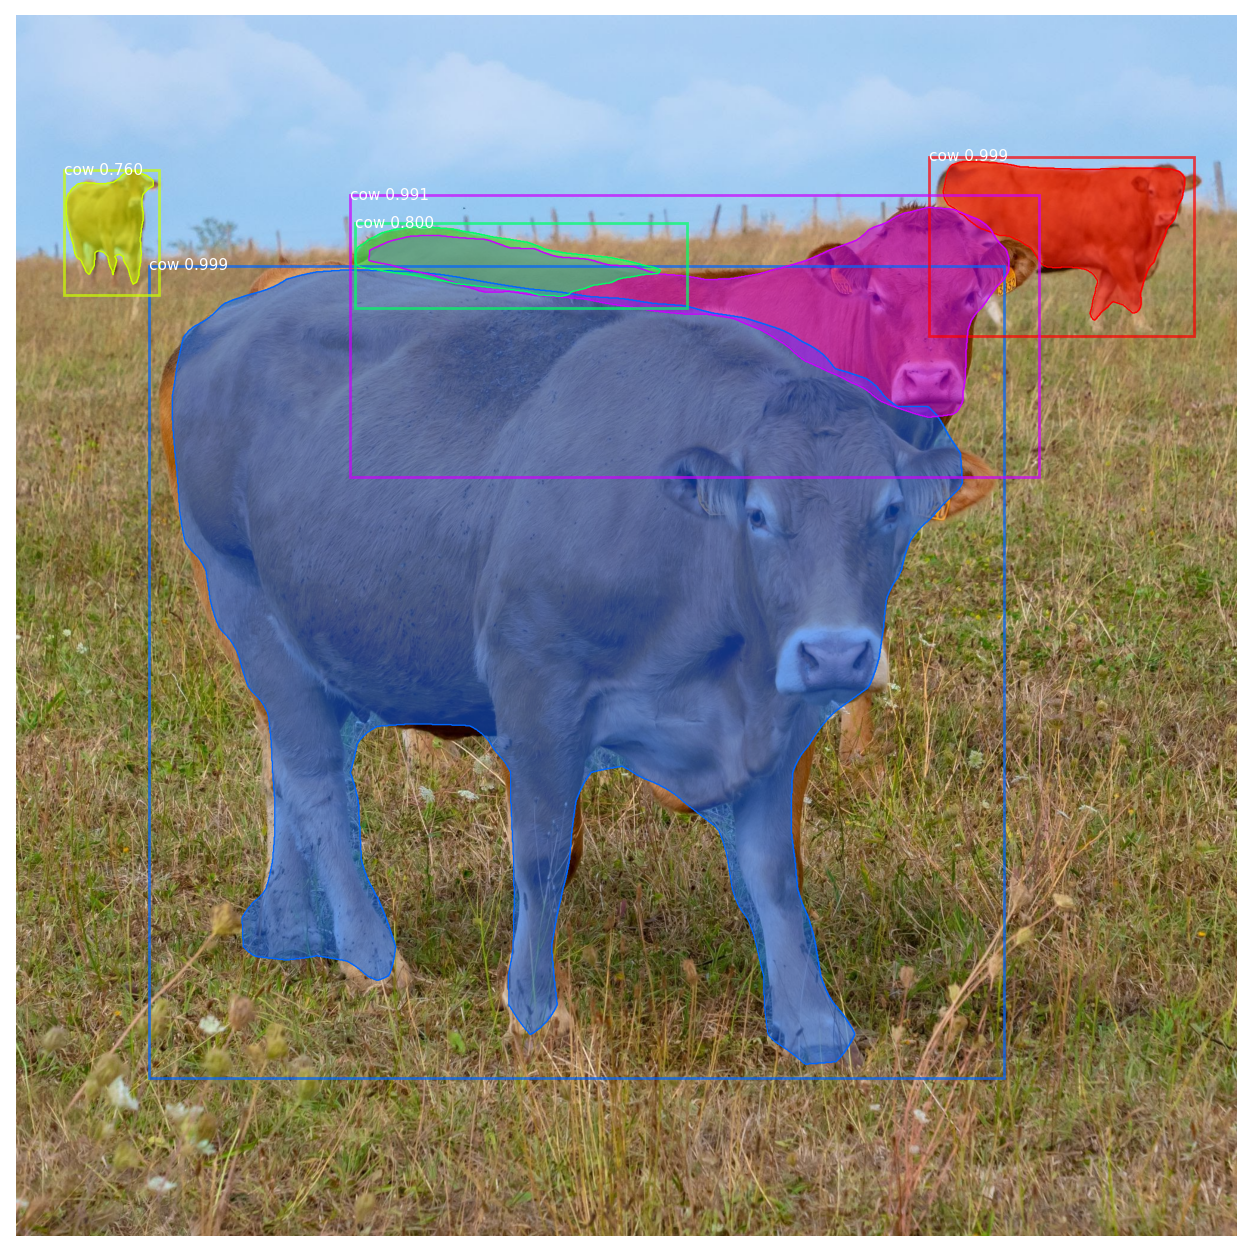

In [12]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath="mask_rcnn_coco.h5", 
                   by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("cow.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image])

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

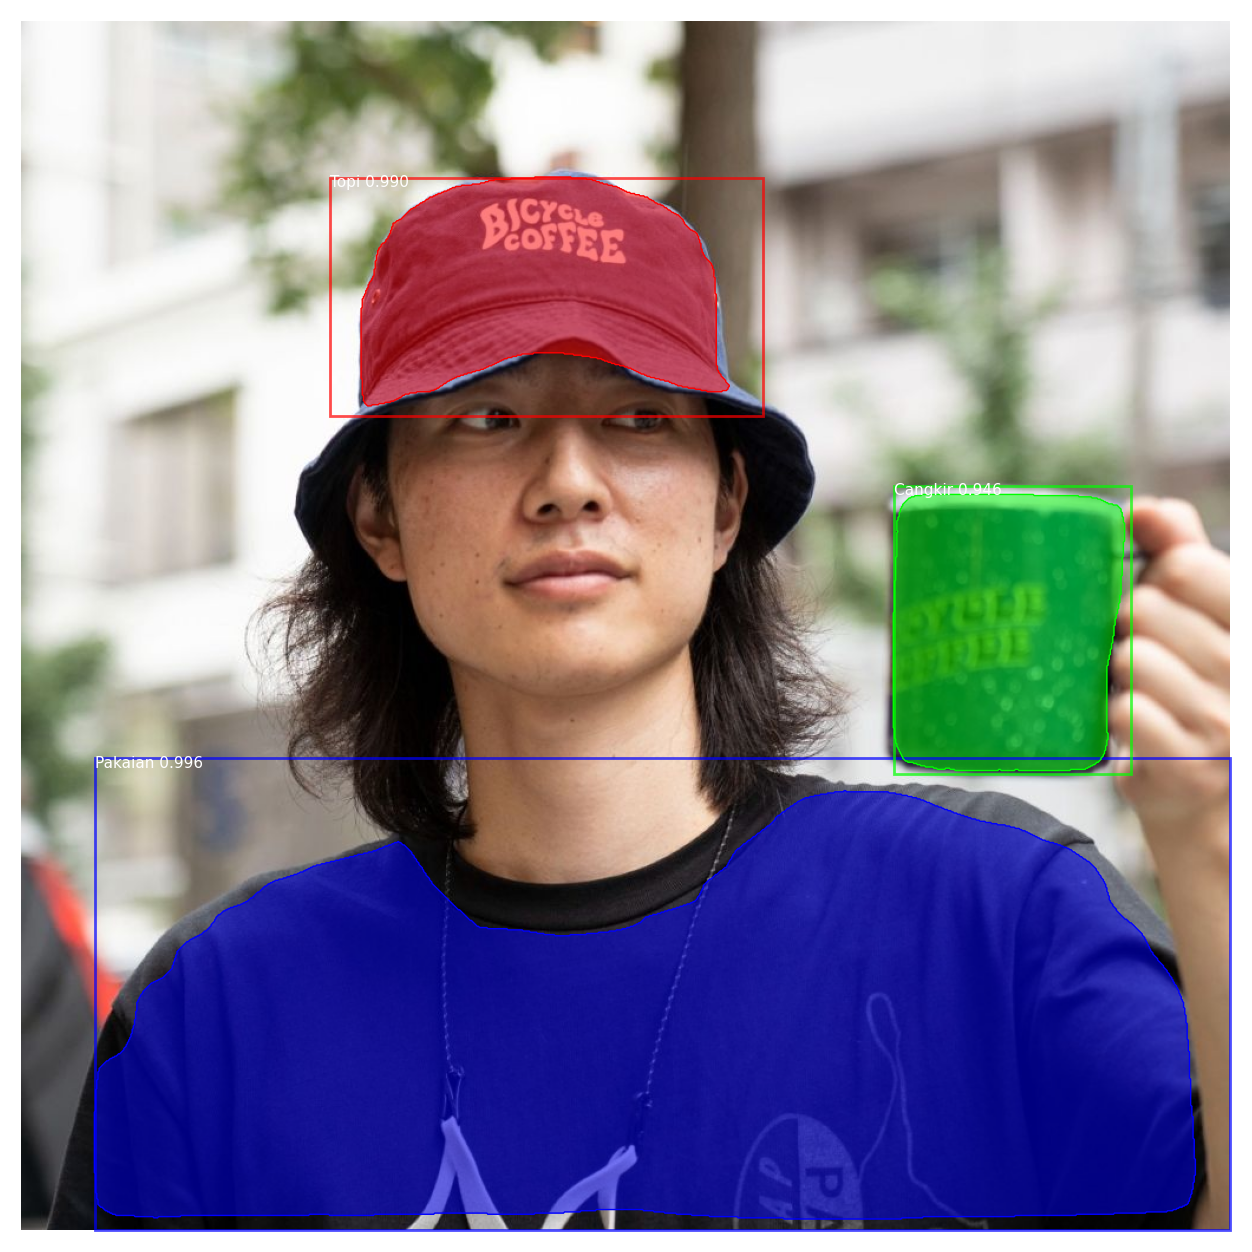

In [13]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG','Topi', 'Pakaian', 'Meja','Cangkir']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath="mask_rcnn_model_cfg_coco_4_0020.h5", 
                   by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset/val/test14.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image])

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

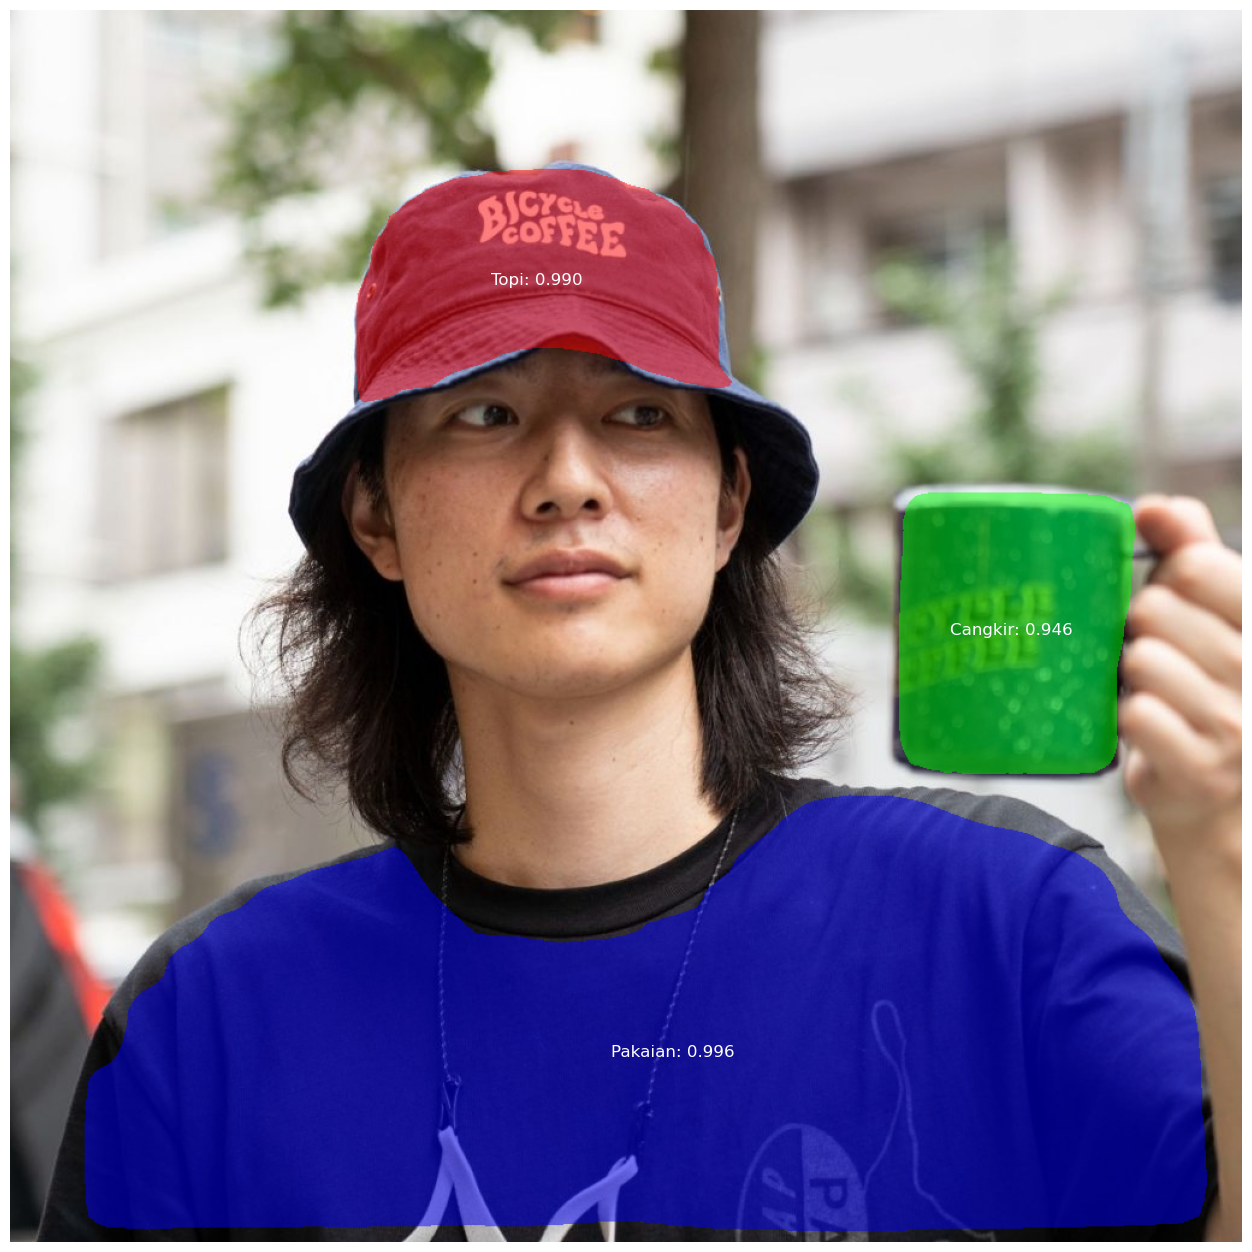

In [15]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the class labels
CLASS_NAMES = ['BG', 'Topi', 'Pakaian', 'Meja', 'Cangkir']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # Set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes = number of classes + 1 (+1 for the background)
    NUM_CLASSES = len(CLASS_NAMES)

# Initialize the Mask R-CNN model for inference and then load the weights.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath="mask_rcnn_model_cfg_coco_4_0020.h5", 
                   by_name=True)

# Load the input image, convert it from BGR to RGB channel
image = cv2.imread("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset/val/test14.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
results = model.detect([image])

# Get the results for the first image.
r = results[0]

# Function to display masks, class names, and scores without bounding boxes
def display_mask_with_labels(image, boxes, masks, class_ids, class_names, scores):
    N = boxes.shape[0]
    if not N:
        print("No instances to display.")
    else:
        assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

    _, ax = plt.subplots(1, figsize=(16, 16))
    colors = mrcnn.visualize.random_colors(N)

    masked_image = image.copy()

    for i in range(N):
        color = colors[i]
        class_id = class_ids[i]
        score = scores[i]
        label = class_names[class_id]

        mask = masks[:, :, i]
        masked_image = mrcnn.visualize.apply_mask(masked_image, mask, color)

        # Find the centroid of the mask to place the text
        y, x = np.where(mask == 1)
        if len(y) > 0 and len(x) > 0:
            centroid_y, centroid_x = int(np.mean(y)), int(np.mean(x))
            ax.text(centroid_x, centroid_y, "{}: {:.3f}".format(label, score), color='w', size=12, 
                    backgroundcolor="none", ha='center', va='center')

    ax.imshow(masked_image)
    ax.axis('off')
    plt.show()

# Visualize the detected objects
display_mask_with_labels(image=image, 
                         boxes=r['rois'], 
                         masks=r['masks'], 
                         class_ids=r['class_ids'], 
                         class_names=CLASS_NAMES, 
                         scores=r['scores'])


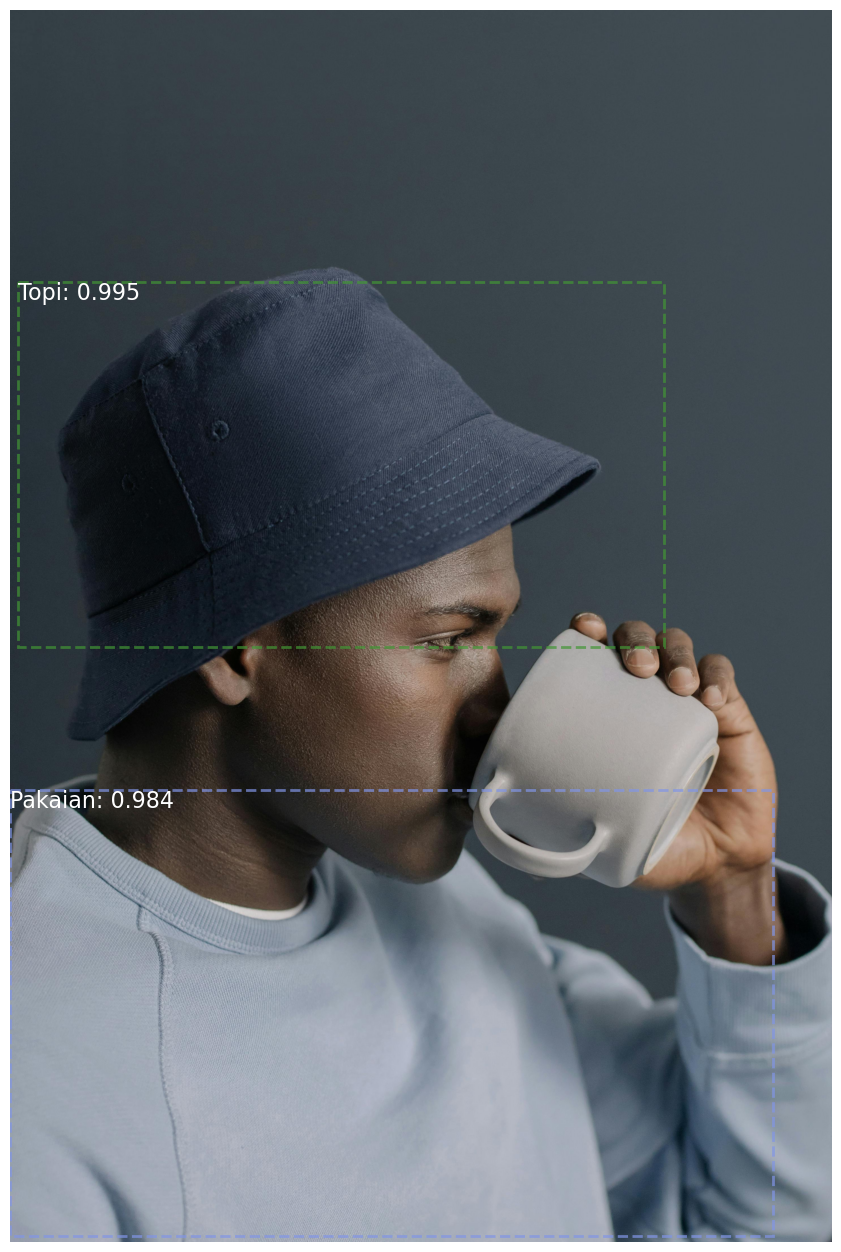

In [21]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Define the class labels
CLASS_NAMES = ['BG', 'Topi', 'Pakaian', 'Meja', 'Cangkir']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # Set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes = number of classes + 1 (+1 for the background)
    NUM_CLASSES = len(CLASS_NAMES)

# Initialize the Mask R-CNN model for inference and then load the weights.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath="mask_rcnn_model_cfg_coco_4_0020.h5", 
                   by_name=True)

# Load the input image, convert it from BGR to RGB channel
image = cv2.imread("C:/Users/judit/Downloads/coba/Mask-RCNN-TF2/dataset/val/test10.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
results = model.detect([image])

# Get the results for the first image.
r = results[0]

# Function to get a distinct color for each class
def random_colors(N):
    colors = []
    for i in range(N):
        colors.append(tuple([random.random() for _ in range(3)]))
    return colors

# Assign a unique color to each class
colors = random_colors(len(CLASS_NAMES))

# Function to display bounding boxes, class names, and scores
def display_bboxes_only(image, boxes, class_ids, class_names, scores, colors):
    N = boxes.shape[0]
    if not N:
        print("No instances to display.")
    else:
        assert boxes.shape[0] == class_ids.shape[0] == scores.shape[0]

    _, ax = plt.subplots(1, figsize=(16, 16))
    
    for i in range(N):
        y1, x1, y2, x2 = boxes[i]
        class_id = class_ids[i]
        score = scores[i]
        label = class_names[class_id]
        
        color = colors[class_id]  # Color for the current class
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                              alpha=0.7, linestyle="dashed",
                              edgecolor=color, facecolor='none')
        ax.add_patch(p)
        
        ax.text(x1, y1, "{}: {:.3f}".format(label, score), color='w', size=16,
                backgroundcolor="none", verticalalignment='top')
    
    ax.imshow(image)
    ax.axis('off')
    plt.show()

# Visualize the detected objects
display_bboxes_only(image=image, 
                    boxes=r['rois'], 
                    class_ids=r['class_ids'], 
                    class_names=CLASS_NAMES, 
                    scores=r['scores'], 
                    colors=colors)
